<table style="background-color: transparent;">
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%" align="center"><font size="7" color="#f25625">Computación Cuántica</font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="4" color="black">Temas Selectos de Ingeniería en Computación III</font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="4" color="black">2025-1</font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="6" color="#f25625">Laboratorio 3: Algoritmos Cuanticos</font></td>
    </tr>
</table>

<table style="background-color: transparent;">
    <tr style="background-color: transparent; text-align:center;">
        </td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="4" color="black">Alumno: Brandon Garay Jacome</font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="4" color="black">421081646</font></td>
    </tr>
</table>


<a id="1"></a>
# 1. Ejercicio 1

1. Codifica una función llamada `teleportacion` que cumpla con lo siguiente:
   1. Reciba parámetros para preparar el estado a ser teleportado.
   2. Reciba otro parámetro que indique que estado de Bell se debe usar para entrelazar los qubits de Alicia y de Bob. Preparar el estado de Bell correspondiente.
   3. Aplique las compuertas correctas en la decodificación dependiendo del estado de Bell indicado como parámetro.
   4. Muestre el circuito creado con el protocolo de Teleportación completo con los parámetros provistos.
      - Recuerda que puedes usar la función `display` para que el `.draw()` del circuito se vea (hay ejemplos de esto en los notebooks).
   5. Muestre una esfera de Bloch con el estado a ser enviado (usar función `display`). El estado lo puedes obtener con `Statevector` (ver Lab1).
   6. Simulación del circuito usando la clase `BasicSimulator` (como en el ejemplo de este Lab3).
      - Está prohibido usar Qiskit Aer (`qiskit-aer`). Muchos ejemplos en internet usan Qiskit Aer, pero no se puede usar en las tareas, así que realiza la adecuación pertinente del código.
      - Muestra el histograma como en el ejemplo de este mismo notebook para comprobar los resultados a través de la simulación.

</br>

<a id="1"></a>
## 1.1. Codigo del Algoritmo

In [14]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.result import marginal_counts
import numpy as np
from IPython.display import display

#Genera un par de Bell según el tipo seleccionado
def generarParBell(circuito, qubitUno, qubitDos, nEstado):
    operaciones = {
        '1': [(circuito.h, [qubitUno]), (circuito.cx, [qubitUno, qubitDos])],
        '2': [(circuito.x, [qubitUno]), (circuito.h, [qubitUno]), (circuito.cx, [qubitUno, qubitDos])],
        '3': [(circuito.x, [qubitDos]), (circuito.h, [qubitUno]), (circuito.cx, [qubitUno, qubitDos])],
        '4': [(circuito.x, [qubitUno]), (circuito.x, [qubitDos]), (circuito.z, [qubitDos]), (circuito.h, [qubitUno]), (circuito.cx, [qubitUno, qubitDos])]
    }
    
    if nEstado not in operaciones:
        raise ValueError("Selecciona un tipo válido")
    
    for operacion, qubits in operaciones[nEstado]:
        operacion(*qubits)
#Ejecuta el protocolo de teleportación cuántica
def ejecutarTeleportacion(anguloTheta, anguloPhi, anguloLambda, nEstado):
    circuitoEstado = QuantumCircuit(1)
    circuitoEstado.u(anguloTheta, anguloPhi, anguloLambda, 0)
    estadoVector = Statevector(circuitoEstado)
    
    # Visualización del estado inicial
    display(estadoVector.draw('latex', prefix="|ψ\rangle ="))
    display(plot_bloch_multivector(estadoVector))
    
    # Configuración de registros cuánticos y clásicos
    qubitsAlicia = QuantumRegister(2, name="alicia")
    qubitBob = QuantumRegister(1, name="bob")
    bitClasicoZ = ClassicalRegister(1, name="bitZ")
    bitClasicoX = ClassicalRegister(1, name="bitX")
    bitBob = ClassicalRegister(1, name="resultadoBob")
    circuito = QuantumCircuit(qubitsAlicia, qubitBob, bitClasicoZ, bitClasicoX, bitBob)
    circuito.u(anguloTheta, anguloPhi, anguloLambda, [qubitsAlicia[0]])
    circuito.barrier()
    # Creación del par entrelazado
    generarParBell(circuito, qubitsAlicia[1], qubitBob[0], nEstado)
    circuito.barrier()
    
    # Alicia realiza la medición en la base de Bell
    circuito.cx(qubitsAlicia[0], qubitsAlicia[1])
    circuito.h(qubitsAlicia[0])
    circuito.barrier()
    
    # Medición de los qubits de Alicia
    circuito.measure(qubitsAlicia[0], bitClasicoZ[0])
    circuito.measure(qubitsAlicia[1], bitClasicoX[0])
    circuito.barrier()
    
    # Bob aplica las correcciones necesarias
    circuito.x(qubitBob[0]).c_if(bitClasicoX, 1)
    circuito.z(qubitBob[0]).c_if(bitClasicoZ, 1)
    circuito.barrier()
    
    # Medición final de Bob
    circuito.measure(qubitBob[0], bitBob)
    
    # Visualización del circuito
    display(circuito.draw('mpl'))
    
    # Simulación del proceso
    simulador = BasicSimulator()
    circuitoInicial = QuantumCircuit(1, 1)
    circuitoInicial.u(anguloTheta, anguloPhi, anguloLambda, 0)
    circuitoInicial.measure(0, 0)
    
    resultadoInicial = simulador.run(circuitoInicial)
    resultadoTeleportacion = simulador.run(circuito)
    
    # Obtención de los resultados
    conteos = resultadoTeleportacion.result().get_counts()
    conteosFinales = marginal_counts(conteos, [2])
    etiquetas = ["Estado inicial", "Estado teleportado"]
    
    display(plot_histogram([resultadoInicial.result().get_counts(), conteosFinales], legend=etiquetas))


<a id="1"></a>
## 1.2. Prueba Estado  $\Phi^+$

<IPython.core.display.Latex object>

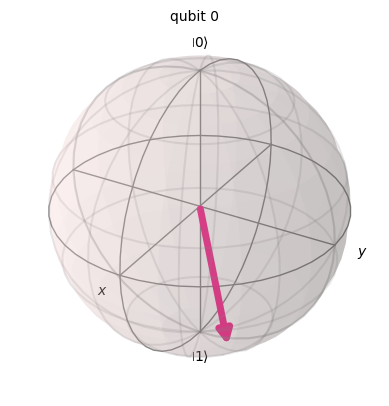

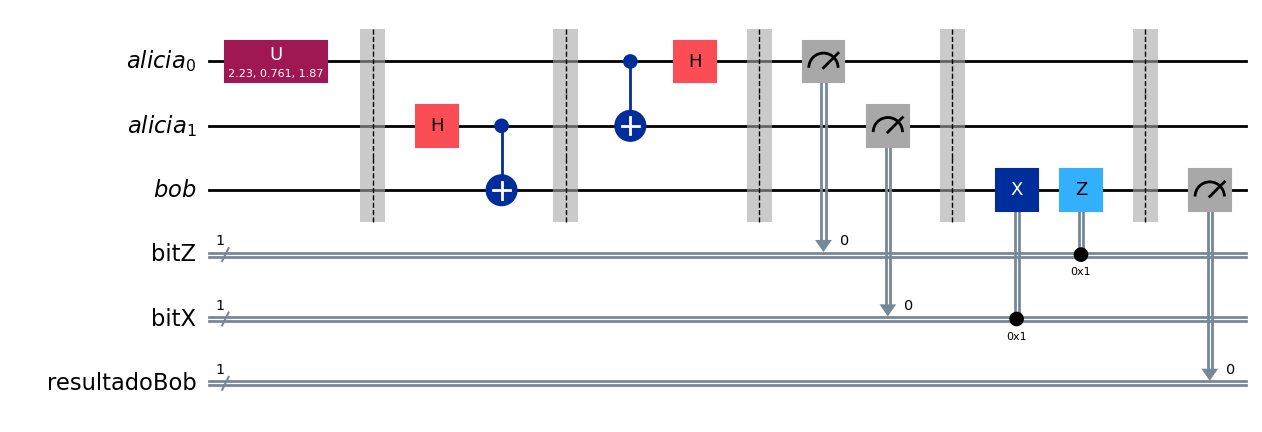

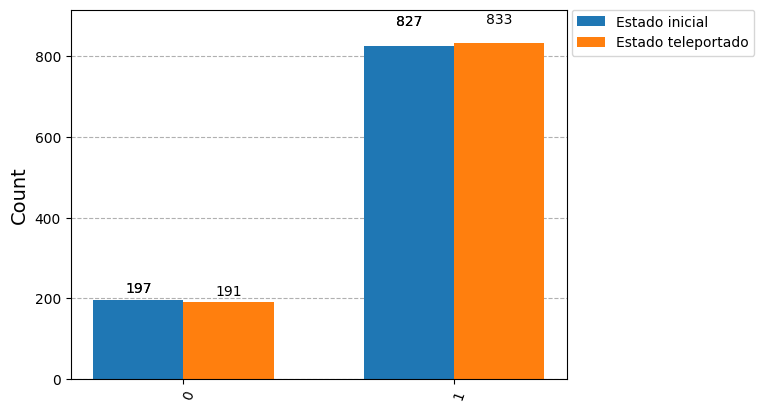

In [15]:
# Ejemplo de ejecución
theta, phi, lam = np.random.rand(3) * np.pi  # Ángulos aleatorios
nEstado = '1'  
ejecutarTeleportacion(theta, phi, lam, nEstado)

<a id="1"></a>
## 1.3. Prueba Estado  $\Phi^-$

<IPython.core.display.Latex object>

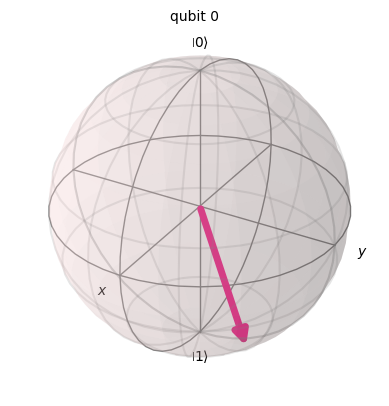

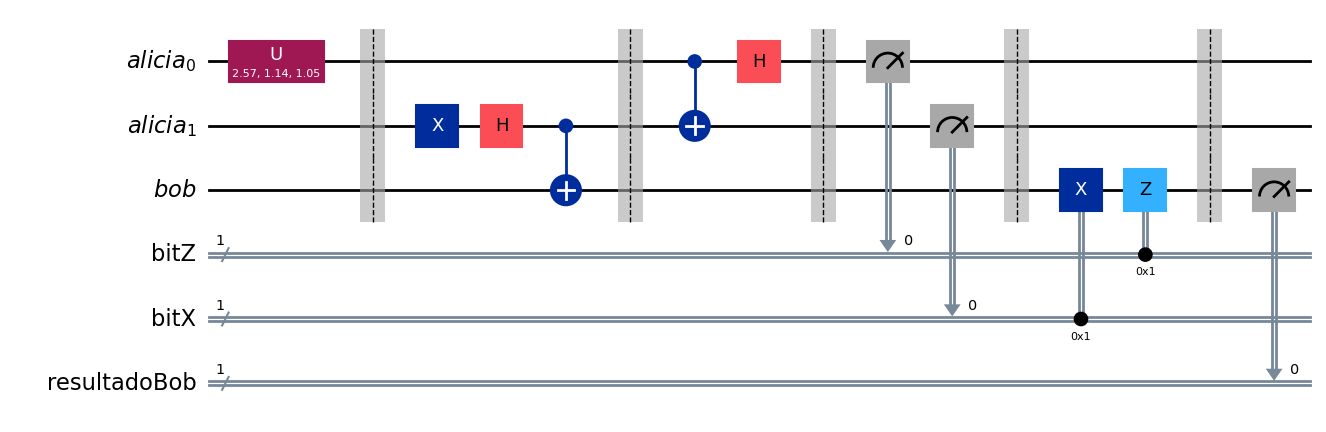

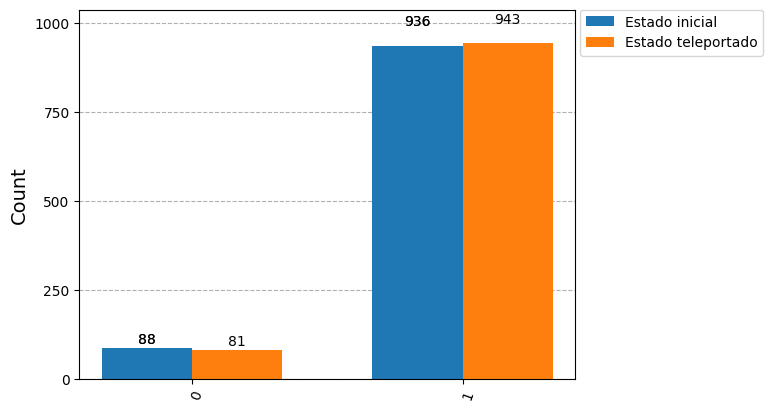

In [16]:
theta, phi, lam = np.random.rand(3) * np.pi  # Ángulos aleatorios
nEstado = '2'  
ejecutarTeleportacion(theta, phi, lam, nEstado)

<a id="1"></a>
## 1.4. Prueba Estado  $\Psi^+$

<IPython.core.display.Latex object>

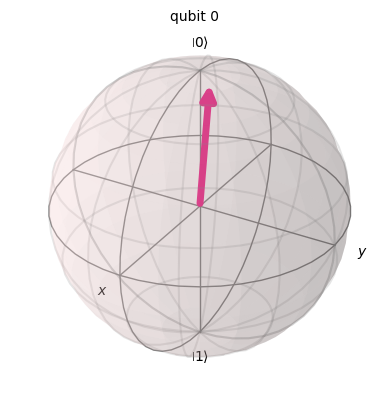

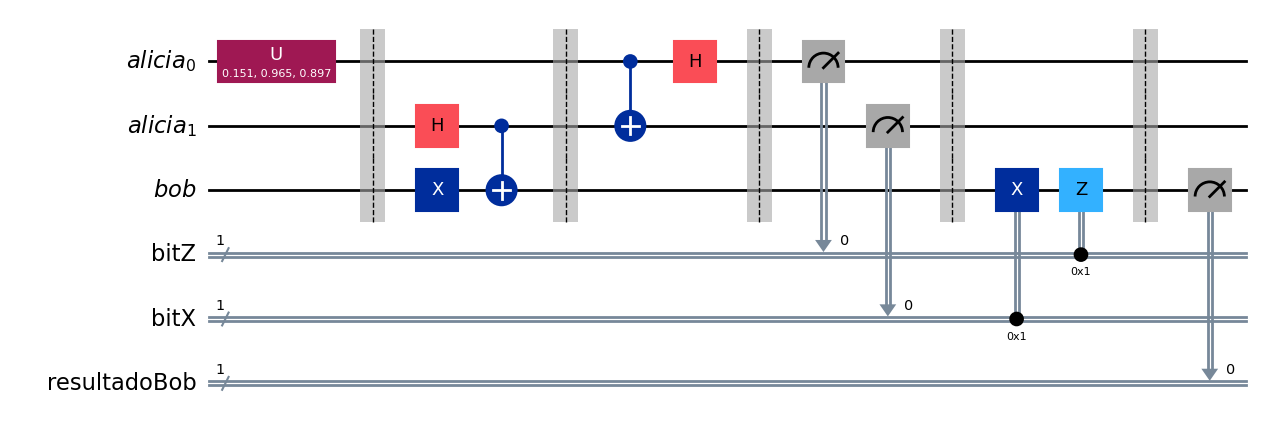

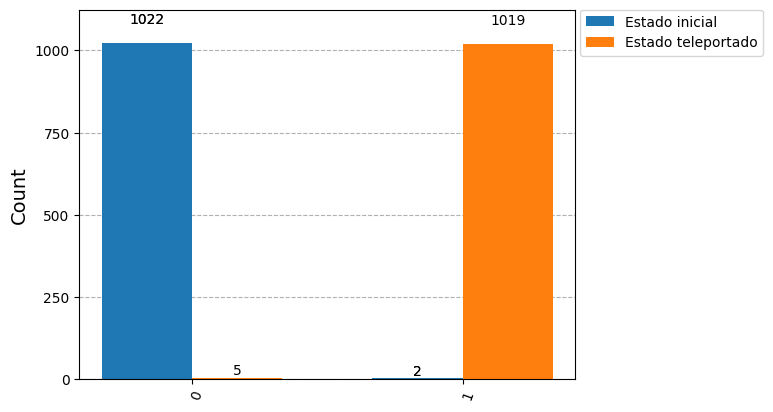

In [17]:
theta, phi, lam = np.random.rand(3) * np.pi  # Ángulos aleatorios
nEstado = '3'  
ejecutarTeleportacion(theta, phi, lam, nEstado)

<a id="1"></a>
## 1.5. Prueba Estado  $\Psi^-$

<IPython.core.display.Latex object>

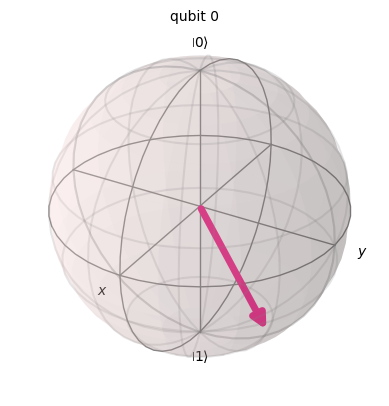

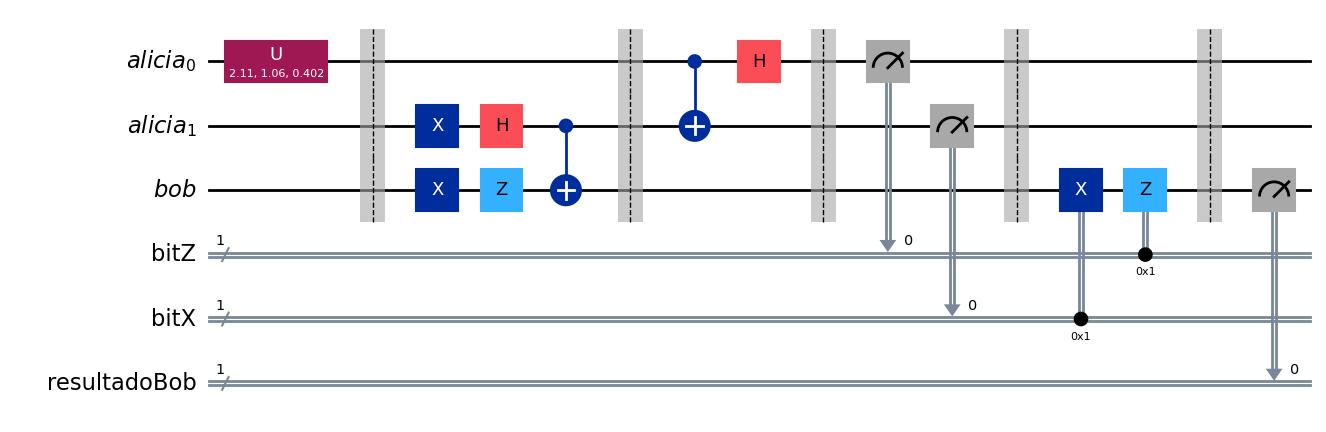

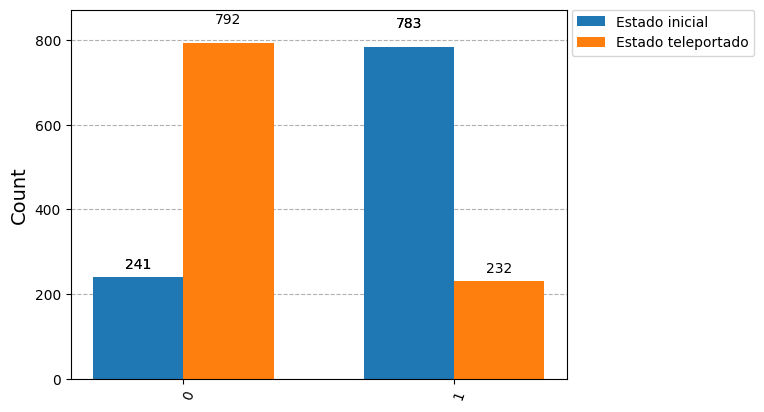

In [18]:
theta, phi, lam = np.random.rand(3) * np.pi  # Ángulos aleatorios
nEstado = '4' 
ejecutarTeleportacion(theta, phi, lam, nEstado)

<a id="1"></a>
# 2. Ejercicio 2

2. Implementa el protocolo de codificación superdensa usando el paquete `spinqit` y simúlalo
    1. Escribe el código en `spinqit`.
       - Hay ejemplos de código con `spinqit` en el notebook del Lab2.
       - El protocolo de codificación superdensa está completo en este mismo notebook (Lab3), solo hay que escribirlo ahora en `spinqit`.
    3. Realiza la simulación en tu computadora usando `BasicSimulatorConfig` (como en los ejemplos).
       - Recuerda que debes tener un ambiente con Python 3.8 y el framework `spinqit` instalado.
    4. Debes mostrar los resultados de este ejercicio 2 en el mismo notebook en el que están los resultados del ejercicio 1.
       - Puedes hacer el ejercicio 1 en un ambiente de conda y guardar el notebook.
       - Luego abrir el notebook de nuevo en un segundo ambiente y realizar este ejercicio 2 en ese segundo ambiente, solo no toques las celdas de tus respuesta del ejercicio 1.

</br>


Resultados de la medición:
{'11': 1024}
Probabilidades:
{'11': 0.9999999999239011}


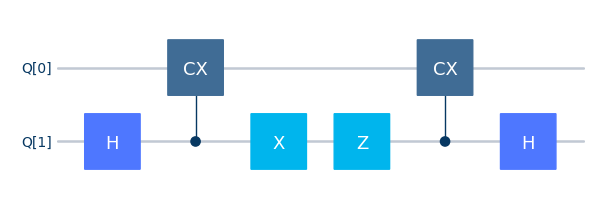

In [1]:
from spinqit import Circuit, H, X, Z, CX
from spinqit import get_basic_simulator, get_compiler, BasicSimulatorConfig
from spinqit import draw
from spinqit.utils import print_circuit

# Definir un par de Bell entre dos cúbits

def generarParBell():
    circuito = Circuit()
    qubits = circuito.allocateQubits(2)
    circuito << (H, qubits[1])  # Aplicar Hadamard al cúbit del emisor
    circuito << (CX, (qubits[1], qubits[0]))  # Aplicar CNOT para generar el entrelazamiento
    return circuito, qubits
    
# Aplicar la codificación del mensaje en el cúbit del emisor
def aplicarCodificacion(circuito, qubit, mensaje):
    # Validar que el mensaje sea una cadena de dos bits ('0' o '1')
    if not isinstance(mensaje, str) or len(mensaje) != 2 or not set(mensaje).issubset({'0', '1'}):
        raise ValueError(f"El mensaje '{mensaje}' no es válido. Debe contener exactamente 2 bits (0 o 1).")
    # Aplicar operaciones cuánticas según el mensaje
    if mensaje[1] == '1':
        circuito << (X, qubit)  # Aplicar X si el segundo bit es '1'
    if mensaje[0] == '1':
        circuito << (Z, qubit)  # Aplicar Z si el primer bit es '1'
    return circuito

def recuperarMensaje(circuito, qubits):
    circuito << (CX, (qubits[1], qubits[0]))  # Aplicar CNOT entre los cúbits
    circuito << (H, qubits[1])  # Aplicar Hadamard al cúbit del emisor
    return circuito

# Generar el par de Bell
circuito, qubits = generarParBell()

# Definir el mensaje a transmitir
mensaje = '11'  
circuito = aplicarCodificacion(circuito, qubits[1], mensaje)
# Transferencia del cúbit al receptor y decodificación
circuito = recuperarMensaje(circuito, qubits)
# Configuración del compilador y simulador
compilador = get_compiler()
simulador = get_basic_simulator()
ejecutable = compilador.compile(circuito, 0)
draw(ejecutable)  # Representar gráficamente el circuito
# Configurar la simulación con 1024 ejecuciones
configSimulador = BasicSimulatorConfig()
configSimulador.configure_shots(1024)
resultado = simulador.execute(ejecutable, configSimulador)

print("\nResultados de la medición:")
print(resultado.counts)
print("Probabilidades:")
print(resultado.probabilities)

<a id="1"></a>
# 3. Ejercicio 3

3. **[Opcional]** Codifica los 4 estados de Bell en `spinqit` y simúlalos
    1. Escribe el código en `spinqit`.
       - Hay ejemplos de código con `spinqit` en el notebook del Lab2.
       - Los estados de Bell y sus circuitos están en el notebook del Lab2.
    3. Realiza la simulación en tu computadora usando `BasicSimulatorConfig` (como en los ejemplos).
       - Recuerda que debes tener un ambiente con Python 3.8 y el framework `spinqit` instalado.
    4. Debes mostrar los resultados de este ejercicio 3 en el mismo notebook en el que están los resultados de los ejercicios 1 y 2.
       - Puedes hacer el ejercicio 1 en un ambiente de conda y guardar el notebook.
       - Luego abrir el notebook de nuevo en un segundo ambiente y realizar este ejercicio 3 (junto con el ejercicio 2) en ese segundo ambiente, solo no toques las celdas de tus respuesta del ejercicio 1.

</br>

<a id="1"></a>
## 3.1. Codigo

In [2]:
from spinqit import Circuit, H, X, Z, CX
from spinqit import get_basic_simulator, get_compiler, BasicSimulatorConfig, draw
from spinqit.utils import print_circuit

def generarEstadoBell(tipoEstado):
    circuito = Circuit()
    qubits = circuito.allocateQubits(2)

    # Configuración de los estados de Bell
    estadosBell = {
        '1': [(H, qubits[0]), (CX, (qubits[0], qubits[1]))],
        '2': [(X, qubits[0]), (H, qubits[0]), (CX, (qubits[0], qubits[1]))],
        '3': [(X, qubits[1]), (H, qubits[0]), (CX, (qubits[0], qubits[1]))],
        '4': [(X, qubits[0]), (X, qubits[1]), (Z, qubits[1]), (H, qubits[0]), (CX, (qubits[0], qubits[1]))]
    }
    
    if tipoEstado not in estadosBell:
        raise ValueError("Selecciona un tipo válido")
    
    for puerta, qubit in estadosBell[tipoEstado]:
        circuito << (puerta, qubit)
    
    # Compilación y ejecución del circuito
    compilador = get_compiler()
    simulador = get_basic_simulator()
    circuitoEjecutable = compilador.compile(circuito, 0)
    draw(circuitoEjecutable)
    
    configuracionSimulador = BasicSimulatorConfig()
    configuracionSimulador.configure_shots(1024)
    resultado = simulador.execute(circuitoEjecutable, configuracionSimulador)
    
    print("\nResultados de la medición:")
    print(resultado.counts)
    print(resultado.probabilities)
    print()


<a id="1"></a>
## 3.2. Prueba Estado  1


Resultados de la medición:
{'00': 512, '11': 512}
{'00': 0.4999999999809753, '11': 0.4999999999809753}



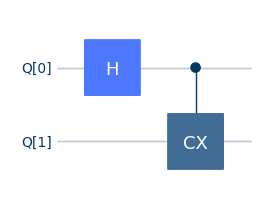

In [3]:
generarEstadoBell('1')

<a id="1"></a>
## 3.3. Prueba Estado  2


Resultados de la medición:
{'00': 512, '11': 512}
{'00': 0.4999999999809753, '11': 0.4999999999809753}



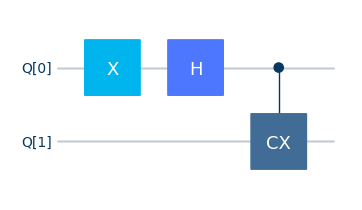

In [4]:
generarEstadoBell('2')

<a id="1"></a>
## 3.4. Prueba Estado  3


Resultados de la medición:
{'01': 512, '10': 512}
{'01': 0.4999999999809753, '10': 0.4999999999809753}



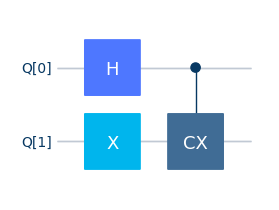

In [5]:
generarEstadoBell('3')

<a id="1"></a>
## 3.5. Prueba Estado  4


Resultados de la medición:
{'01': 512, '10': 512}
{'01': 0.4999999999809753, '10': 0.4999999999809753}



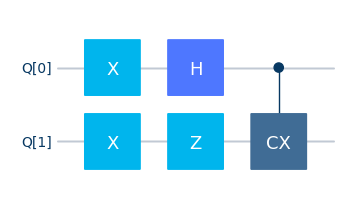

In [6]:
generarEstadoBell('4')